In [171]:
import pandas as pd

df = pd.read_csv("/kaggle/input/ipl-2022-players-data/IPLData.csv")
df.head()
df.isnull().sum()
#df.describe()
# Fill numeric NaNs with median


Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                208
Run_outs               208
Stumps                 208
dtype: int64

In [172]:
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill categorical NaNs with mode (avoid chained assignment warning)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # Explicit column assignment

df.isnull().sum()

Player Name            0
Team                   0
Nationality            0
Player_Type            0
Capped                 0
Matches_Played         0
Runs                   0
Average                0
Strike_Rate            0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
Catches                0
Run_outs               0
Stumps                 0
dtype: int64

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

top_run_scores = df[['Player Name', 'Team', 'Runs']].sort_values(by = 'Runs', ascending = False).head()
print(top_run_scores)

plt.figure(figsize=(8,5))
'''#sns.barplot(data = top_run_scores, x = 'Runs', y = 'Player Name', palette = 'coolwarm')
plt.xlabel('Total Runs')
plt.ylabel('Player name')
plt.title('Top run scores')
#plt.show()'''


        Player Name       Team    Runs
208     Virat Kohli  Bangalore  6283.0
0    Shikhar Dhawan     Punjab  5783.0
205   Rohit Sharma      Mumbai  5611.0
19    David Warner       Delhi  5449.0
213        MS Dhoni    Chennai  4746.0


"#sns.barplot(data = top_run_scores, x = 'Runs', y = 'Player Name', palette = 'coolwarm')\nplt.xlabel('Total Runs')\nplt.ylabel('Player name')\nplt.title('Top run scores')\n#plt.show()"

<Figure size 800x500 with 0 Axes>

In [174]:
top_wicket_takers = df[['Player Name', 'Team','Wickets']].sort_values(by = 'Wickets', ascending  = False).head()

print(top_wicket_takers) 

'''plt.figure(figsize=(8,5))
sns.barplot(data = top_wicket_takers, x = 'Wickets', y = 'Player Name', palette = 'coolwarm')
plt.xlabel('Total Runs')
plt.ylabel('Player name')
plt.title('Top wicket taker')
plt.show()
'''


              Player Name       Team  Wickets
129         Dwayne Bravo     Chennai    167.0
190         Benny Howell      Punjab    150.0
127  Ravichandran Ashwin   Rajasthan    145.0
232         Sunil Narine     Kolkata    143.0
45      Bhuvneshwar Kumar  Hyderabad    142.0


"plt.figure(figsize=(8,5))\nsns.barplot(data = top_wicket_takers, x = 'Wickets', y = 'Player Name', palette = 'coolwarm')\nplt.xlabel('Total Runs')\nplt.ylabel('Player name')\nplt.title('Top wicket taker')\nplt.show()\n"

  Nationality        Runs    Wickets
0      Indian  710.138365  26.128931
1    Overseas  605.434211  27.710526


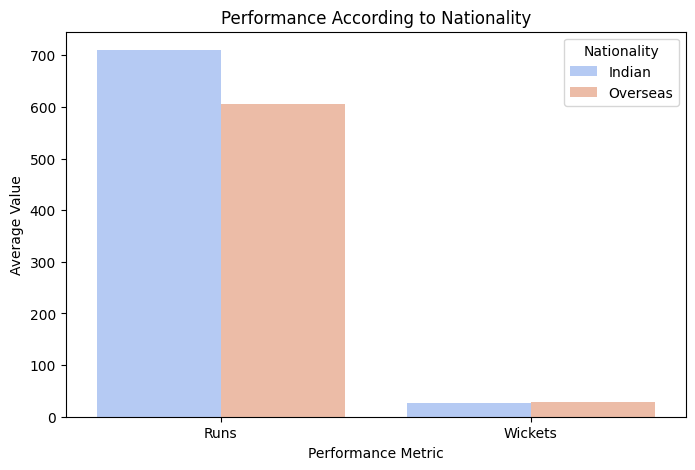

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate average runs and wickets by nationality
performance_nationality = df.groupby('Nationality').agg({'Runs': 'mean', 'Wickets': 'mean'}).reset_index()
print(performance_nationality)

# Melt dataframe for visualization
performance_melted = performance_nationality.melt(id_vars=['Nationality'], var_name='Metric', value_name='Average Value')

# Plot
plt.figure(figsize=(8,5))  # Fixed typo
sns.barplot(data=performance_melted, x='Metric', y='Average Value', hue='Nationality', palette='coolwarm')
plt.xlabel('Performance Metric')
plt.ylabel('Average Value')
plt.title('Performance According to Nationality')
plt.legend(title='Nationality')
plt.show()
